In [45]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.data_utils import transform_for_classification
from scripts.constants import TEST_DATASETS_FOR_DATASET, TARGET_COLUMNS_FOR_DATASET
from scripts.base_lr import run_logistic_regression_on_2d
from scripts.base_clf import run_classification
from sklearn.dummy import DummyClassifier 

In [47]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")

In [48]:
discretization_lr_results = pd.read_csv(os.path.join(RESULTS_FOLDER, "discretization_logistic_regression_results.csv"))

In [49]:
def get_datasets_data(dataset_name):

    train_df_path = os.path.join(CURRENT_FOLDER, f"data/datasets/{dataset_name}.csv")
    train_df = pd.read_csv(train_df_path)

    test_df_path = TEST_DATASETS_FOR_DATASET[dataset_name]
    test_df = pd.read_csv(os.path.join(CURRENT_FOLDER, test_df_path))
    
    return train_df, test_df

In [50]:
def run_lr(dataset_name, train_df, test_df):
    train_df_transformed = transform_for_classification(dataset_name, train_df)

    df_np = train_df_transformed.to_numpy()

    target_column: str = TARGET_COLUMNS_FOR_DATASET[dataset_name]
    feature_columns = [col for col in train_df_transformed.columns if col != target_column]

    X_train, y_train = train_df_transformed.drop(columns=[target_column]), train_df_transformed[target_column]

    test_df_transformed = transform_for_classification(dataset_name, test_df)

    # Check that both have equal columns
    assert set(list(train_df_transformed.columns.values)).symmetric_difference(
        set(list(test_df_transformed.columns.values))) == set()

    target_column_index = train_df_transformed.columns.get_loc(target_column)

    X_test, y_test = test_df_transformed.drop(columns=[target_column]), test_df_transformed[target_column]

    accuracy_score, balanced_accuracy_score, f1_score, \
    coefficients, point_estimates, variance_estimates, confidence_intervals = \
        run_logistic_regression_on_2d(df_np,
                                      X_train,
                                      y_train,
                                      X_test,
                                      y_test,
                                      return_confidence_intervals=True,
                                      col_to_predict=target_column_index)
    
    return accuracy_score, balanced_accuracy_score, f1_score, coefficients, point_estimates, variance_estimates, confidence_intervals

In [51]:
dataset_name = 'adult_no_discretization'
train_df, test_df = get_datasets_data(dataset_name)
best_no_discretization_accuracy, best_no_discretization_balanced_accuracy_score, best_no_discretization_f1_score, \
    coefficients, point_estimates, variance_estimates, \
    confidence_intervals = run_lr(dataset_name, train_df, test_df)

print(best_no_discretization_accuracy)
print(best_no_discretization_balanced_accuracy_score)
print(best_no_discretization_f1_score)

discretization_lr_results.loc[len(discretization_lr_results.index)] = [
    None, 'adult_no_discretization', np.nan, [], "∞", "NUTS", best_no_discretization_accuracy, best_no_discretization_balanced_accuracy_score, best_no_discretization_f1_score, None, None, None
] 

0.8396414342629482
0.7472744575561476
0.6341463414634146


In [52]:
models = [
    DummyClassifier(strategy="most_frequent"),
]

dataset_name = 'adult_no_discretization'
train_df, test_df = get_datasets_data(dataset_name)
scores = run_classification(train_df, test_df, 'compensation', models)[0]
dummy_no_discretization_accuracy, dummy_no_discretization_balanced_accuracy, dummy_no_discretization_f1_score = scores[1], scores[2], scores[3]

print(dummy_no_discretization_accuracy)
print(dummy_no_discretization_balanced_accuracy)
print(dummy_no_discretization_f1_score)

0.7543160690571049
0.5
0.0


In [53]:
dataset_name = 'adult_low_discretization'
train_df, test_df = get_datasets_data(dataset_name)
best_low_discretization_accuracy, best_low_discretization_balanced_accuracy_score, best_low_discretization_f1_score, \
    coefficients, point_estimates, variance_estimates, \
    confidence_intervals = run_lr(dataset_name, train_df, test_df)

print(best_low_discretization_accuracy)
print(best_low_discretization_balanced_accuracy_score)
print(best_low_discretization_f1_score)

discretization_lr_results.loc[len(discretization_lr_results.index)] = [
    None, 'adult_low_discretization', np.nan, [], "∞", "NUTS", 
    best_low_discretization_accuracy, best_low_discretization_balanced_accuracy_score, best_low_discretization_f1_score, None, None, None
] 

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


0.7912350597609562
0.7754192044156832
0.6366158113730929


In [54]:
models = [
    DummyClassifier(strategy="most_frequent"),
]

dataset_name = 'adult_low_discretization'
train_df, test_df = get_datasets_data(dataset_name)
scores = run_classification(train_df, test_df, 'compensation', models)[0]
dummy_low_discretization_accuracy, dummy_low_discretization_balanced_accuracy, dummy_low_discretization_f1_score = scores[1], scores[2], scores[3]

print(dummy_low_discretization_accuracy)
print(dummy_low_discretization_balanced_accuracy)
print(dummy_low_discretization_f1_score)

0.7543160690571049
0.5
0.0


In [55]:
dataset_name = 'adult_high_discretization'
train_df, test_df = get_datasets_data(dataset_name)
best_high_discretization_accuracy, best_high_discretization_balanced_accuracy_score, best_high_discretization_f1_score, \
    coefficients, point_estimates, variance_estimates, \
    confidence_intervals = run_lr(dataset_name, train_df, test_df)

best_high_discretization_accuracy = accuracy_score
best_high_discretization_balanced_accuracy_score = balanced_accuracy_score
best_high_discretization_f1_score = f1_score


discretization_lr_results.loc[len(discretization_lr_results.index)] = [
    None, 'adult_high_discretization', np.nan, [], "∞", "NUTS", 
    best_high_discretization_accuracy, best_high_discretization_balanced_accuracy_score, best_high_discretization_f1_score, None, None, None
] 

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [56]:
models = [
    DummyClassifier(strategy="most_frequent"),
]

dataset_name = 'adult_high_discretization'
train_df, test_df = get_datasets_data(dataset_name)
scores = run_classification(train_df, test_df, 'compensation', models)[0]
dummy_high_discretization_accuracy, dummy_high_discretization_balanced_accuracy, dummy_high_discretization_f1_score = scores[1], scores[2], scores[3]

print(dummy_high_discretization_accuracy)
print(dummy_high_discretization_balanced_accuracy)
print(dummy_high_discretization_f1_score)

0.7543160690571049
0.5
0.0


In [57]:
discretization_lr_results_combined = discretization_lr_results[discretization_lr_results['dataset_index'].isna()]

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


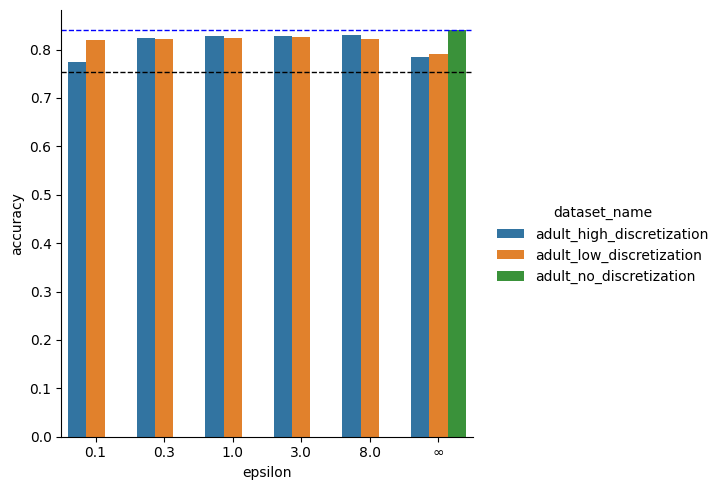

In [71]:
g = sns.catplot(data=discretization_lr_results_combined, kind="bar", x="epsilon", hue="dataset_name", y="accuracy")
g.refline(y = best_no_discretization_accuracy, color = "blue", lw = 1)
g.refline(y = dummy_no_discretization_accuracy, color = "black", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_combined_accuracy.pdf"))

In [72]:
discretization_lr_results_single = discretization_lr_results[(discretization_lr_results['dataset_index'].isna() == False) | (discretization_lr_results['epsilon'] == "∞")]

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


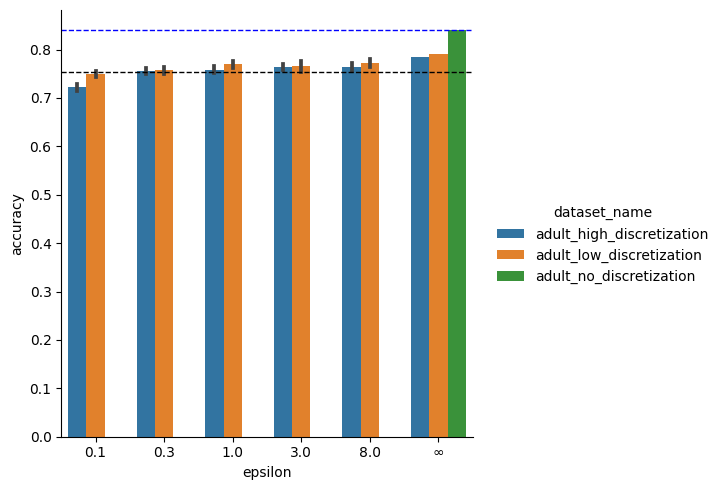

In [73]:
g = sns.catplot(data=discretization_lr_results_single, kind="bar", x="epsilon", hue="dataset_name", y="accuracy")
g.refline(y = best_no_discretization_accuracy, color = "blue", lw = 1)
g.refline(y = dummy_no_discretization_accuracy, color = "black", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_single_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


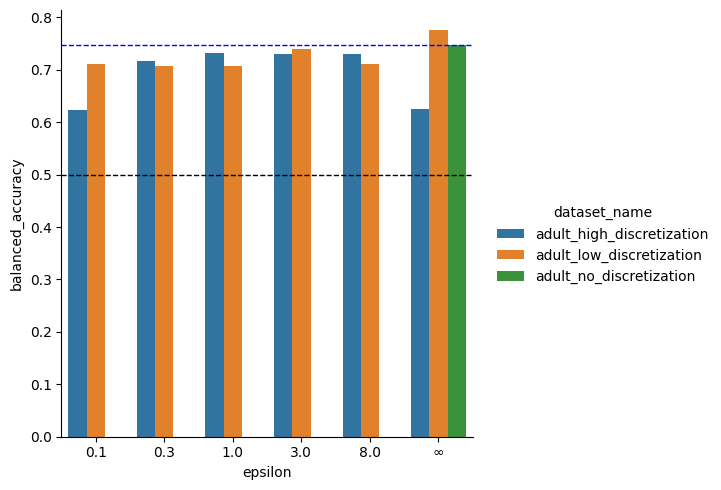

In [74]:
g = sns.catplot(data=discretization_lr_results_combined, kind="bar", x="epsilon", hue="dataset_name", y="balanced_accuracy")
g.refline(y = best_no_discretization_balanced_accuracy_score, color = "blue", lw = 1)
g.refline(y = dummy_no_discretization_balanced_accuracy, color = "black", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_combined_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


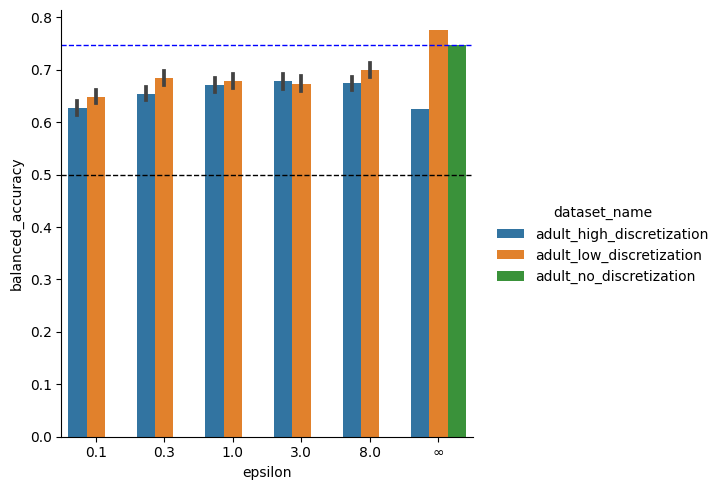

In [75]:
g = sns.catplot(data=discretization_lr_results_single, kind="bar", x="epsilon", hue="dataset_name", y="balanced_accuracy")
g.refline(y = best_no_discretization_balanced_accuracy_score, color = "blue", lw = 1)
g.refline(y = dummy_no_discretization_balanced_accuracy, color = "black", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_single_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


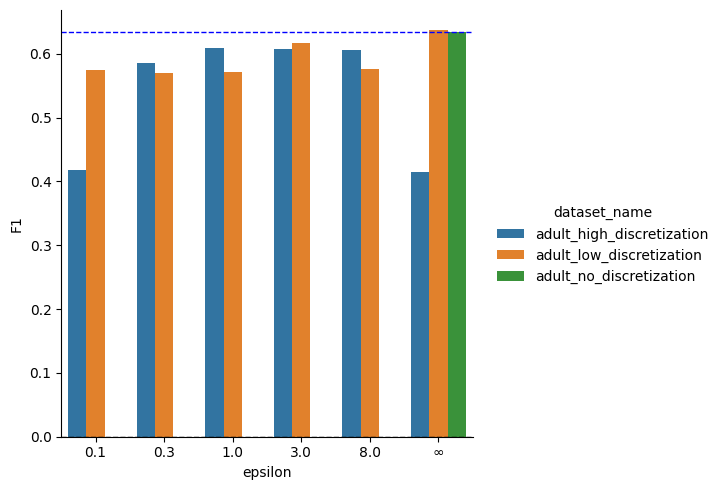

In [76]:
g = sns.catplot(data=discretization_lr_results_combined, kind="bar", x="epsilon", hue="dataset_name", y="F1")
g.refline(y = best_no_discretization_f1_score, color = "blue", lw = 1)
g.refline(y = dummy_no_discretization_f1_score, color = "black", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_combined_f1.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


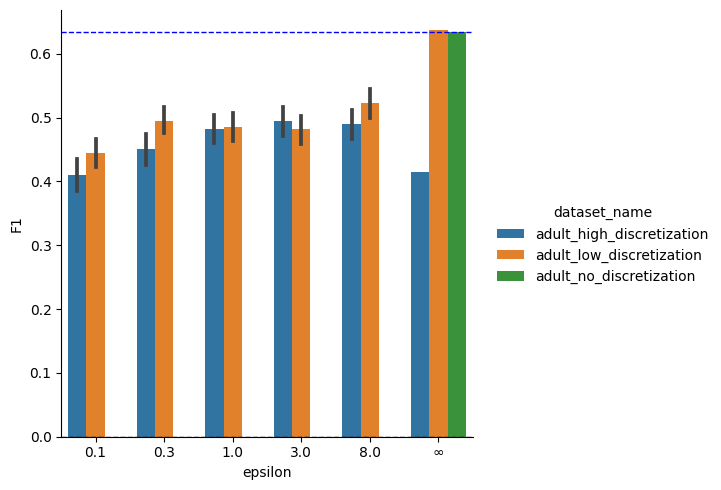

In [77]:
g = sns.catplot(data=discretization_lr_results_single, kind="bar", x="epsilon", hue="dataset_name", y="F1")
g.refline(y = best_no_discretization_f1_score, color = "blue", lw = 1)
g.refline(y = dummy_no_discretization_f1_score, color = "black", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_single_f1.pdf"))